# TMA4320 - Project 3: <br> Simulating the action potential with random walk of ions
**Group number:** 27 <br>
**Group members:** Marte K. Høiskar, Maren Lium and Johanna U. Marstrander

## 1 $\,$ Theory
Skal vi skrive noe her? JAAAA

In one dimention the diffusion equation takes the form 

\begin{equation}
    \frac{\partial \phi \left( x, t \right)}{\partial x} = \frac{\partial}{\partial x} \left(D \left(x \right) \frac{\partial \phi (x, t)}{\partial x} \right)
\end{equation}

where $\phi(x,t)$ is the distribution of a substance and $D(x)$ is the (position dependent) diffusion coefficient.

## 2 $\,$ Excercises

### Excercise 2.1
*Task:* <br>
Show that the function

\begin{equation}
    \tilde{\phi} \left( x, t \right) = \frac{1}{\sqrt{4 \pi D t}} e^{ - \frac{\left( x - \mu \right)^2}{4Dt} },
\end{equation}

where D is a constant, is a solution of the diffusion equation. 

*Answer:*<br>

Since the D is a constant, the diffusion equation will be given by

\begin{equation}
    \frac{\partial \phi \left( x, t \right)}{\partial t} = D \frac{\partial^2 \phi (x, t)}{\partial x^2}.
\end{equation}

Calculating the partial derivatives of $\tilde{\phi} \left( x, t \right)$:

\begin{align}
    \frac{\partial \phi \left( x, t \right)}{\partial t} &= e^{-\frac{(x-\mu)^2}{4Dt}}\frac{\partial}{\partial t} \frac{1}{\sqrt{4 \pi Dt}} + \frac{1}{\sqrt{4 \pi Dt}}\frac{\partial}{\partial t} e^{-\frac{(x-\mu)^2}{4Dt}} \\
     &= \frac{- 4\pi D}{2 \left( 4\pi Dt \right)^{\frac{3}{2}}}e^{-\frac{(x-\mu)^2}{4Dt}}+\frac{1}{\sqrt{4 \pi Dt}} \left( e^{-\frac{(x-\mu)^2}{4Dt}} \frac{(x-\mu)^2}{4Dt^2}  \right ) \\
     &= \frac{e^{\frac{(x-\mu)^2}{4Dt}}}{\sqrt{4\pi Dt}} \left ( \frac{(x-\mu)^2}{4Dt^2}-\frac{1}{2t} \right ) \\ \\
      \frac{\partial \phi \left( x,t \right)}{\partial x} &= \frac{1}{\sqrt{4 \pi Dt}}\frac{\partial}{\partial x} e^{-\frac{(x-\mu)^2}{4Dt}} \\
      &= \frac{1}{\sqrt{4 \pi Dt}}e^{-\frac{(x-\mu)^2}{4Dt}} \left( -\frac{2(x-\mu)}{4Dt} \right) \\
       &= -\frac{e^{-\frac{(x-\mu)^2}{4Dt}}}{2Dt\sqrt{4\pi Dt}} \left( x-\mu \right) \\ \\
      \frac{\partial^2 \phi \left( x,t \right)}{\partial x^2} &= -\frac{1}{2Dt\sqrt{4\pi Dt}} \left ( (x-\mu) \frac{\partial}{\partial x} \left( e^{-\frac{(x-\mu)^2}{4Dt}} \right) + e^{-\frac{(x-\mu)^2}{4Dt}}\frac{\partial}{\partial x}(x-\mu) \right) \\
      &= -\frac{1}{2Dt\sqrt{4\pi Dt}} \left( -e^{-\frac{(x-\mu)^2}{4Dt}}\frac{2(x-\mu)^2}{4Dt}+e^{-\frac{(x-\mu)^2}{4Dt}} \right) \\
      &= \frac{e^{\frac{(x-\mu)^2}{4Dt}}}{D\sqrt{4\pi Dt}} \left ( \frac{(x-\mu)^2}{4Dt^2}-\frac{1}{2t} \right )
\end{align}

Thus, 

\begin{equation}
    \frac{\partial \phi \left( x, t \right)}{\partial t} = \frac{e^{\frac{(x-\mu)^2}{4Dt}}}{\sqrt{4\pi Dt}} \left ( \frac{(x-\mu)^2}{4Dt^2}-\frac{1}{2t} \right ) = D \frac{\partial^2 \phi (x, t)}{\partial x^2}
\end{equation}

Hence, $\tilde{\phi} \left( x, t \right)$ is a solution to the diffusion equation. 

### Excercise 2.2
#### 2.2.1
*Task:*<br>
(Initial value problem.) Given the particle distribution

\begin{equation}
    \phi \left( x, 0 \right)
    =
    \delta \left( x - x_0 \right),
\end{equation}

where $\delta(x)$ is the dirac delta function, find the particle distribution a time $t$.

*Answer:*  

**Solution by fourier transform**

<font color = red> Uhm trenger hjelp til notasjon med hatter og sånt... </font>

A solution to this initial value problem can be found by using fourier transform of the diffusion equation,

\begin{equation}
    \frac{\partial}{\partial t} \widehat{\phi \left( x, t \right)}
    = - D k^2 \widehat{\phi \left( x, t \right)} \\
    \text{eller} \\
    \frac{\partial}{\partial t} \hat{\phi} \left( k, t \right)
    = - D k^2 \hat{\phi} \left( k, t \right) \\
    ?,
\end{equation}

which yields a solution on the form

\begin{equation}
    \hat{\phi} \left( k, t \right) = C(k) e^{-D k^2 t}.
\end{equation}

By using the initial condition given, one can find the expression for $C(k)$

\begin{equation}
    \hat{\phi} \left( k, 0 \right) 
    = C \left( k \right) 
    = \widehat{\delta \left( x - x_0 \right)} 
    = \frac{1}{\sqrt{2 \pi}} e^{-i k x_0}.
\end{equation}

By inserting the expression for $C(k)$ into the solution of the fourier transform of the diffusion equation, one can find the expression for $\phi (x, t)$ by using inverse fourier transform,

\begin{equation}
    \phi \left( x, t \right) 
    = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \hat{\phi} \left(k, t \right) e^{i k x} \text{d}k 
    = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-D k^2 t} e^{ik \left( x - x_0 \right)} \text{d}k
\end{equation}

By inserting the initial condition, it is shown that this is a solution to our problem 

\begin{equation}
    \phi \left( x, 0 \right) 
    = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{ik \left( x - x_0 \right)} \text{d}k 
    = \delta \left( x - x_0 \right).
\end{equation}

It can also be pointed out that this is equivalent with the form given in the project description <font color=red> (trenger vi å forklare hvorfor? For jeg skjønner ish, men ikke godt nok til å forklare med 100% sikkerhet) </font>

\begin{equation}
    \phi \left( x, t \right) 
    = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-D k^2 t} e^{-ik \left( x - x_0 \right)} \text{d}k.   
\end{equation}


**??Solution by Taylor expansion??**

<font color = red> Skal vi gidde å ta med dette? Har skjønt det og fått det til, men blir en god del tekst.</font>

**Solution of the integral**

The integral form of $\phi(x, t)$ can be rewritten to the form

\begin{equation}
    \phi \left( x, t \right) 
    = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-D k^2 t} e^{-ik \left( x - x_0 \right)} \text{d}k 
    = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{- \left( \sqrt{Dt}k + \frac{i \left( x - x_0 \right)}{\sqrt{4Dt}} \right)^2} e^{- \frac{\left( x - x_0 \right)^2 }{4Dt}} \text{d}k. 
\end{equation}

By defining $z = \sqrt{Dt}k + \frac{i \left( x - x_0 \right)}{\sqrt{4Dt}}$ and using substitution such that $\text{d}k = \frac{\text{d}z}{\sqrt{Dt}}$, the integral yields

\begin{equation}
    \phi \left( x, t \right) 
    =  \frac{1}{\pi \sqrt{4Dt}} e^{- \frac{\left( x - x_0 \right)^2 }{4Dt}} \int_{-\infty}^{\infty} e^{z^2} \text{d}z, 
\end{equation}

which can be solved since the solution of the integral $\int_{-\infty}^{\infty} e^{z^2} \text{d}z = \sqrt{\pi}$ is known. The final solution is

\begin{equation}
    \phi \left( x, t \right) 
    = \frac{1}{\sqrt{4 \pi Dt}} e^{- \frac{\left( x - x_0 \right)^2 }{4Dt}}.
\end{equation}

#### 2.2.2
*Task:*  
Use the results of Exercise 2.2.1 to give a physical interpretation of the diffusion coefficient D.

*Answer:*<br>

#### 2.2.3
*Task:*  
Use the results from Exercise 2.2.1 to find the time evolution $\phi(x, t)$ given another initial condition $\phi(x, 0) = g(x)$, where $g(x)$ is an arbitrary function.

*Answer:*  

Given an arbitrary starting distribution $\phi (x, 0) = g(x)$, the time evolution can be found by using fourier transform of the diffusion equation, 

\begin{equation}
    \frac{\partial}{\partial t} \hat{\phi} \left( k, t \right)
    = - D k^2 \hat{\phi} \left( k, t \right),
\end{equation}

which yields a solution on the form

\begin{equation}
    \hat{\phi} \left( k, t \right) = C(k) e^{-D k^2 t}.
\end{equation}

By realising that $g(x) = \mathcal{F} \left[ \hat{\phi} \left( k, 0 \right) \right] = \mathcal{F} \left[ C(k) \right]$, such that

\begin{equation}
    \hat{\phi} \left( k, t \right) = \hat{g} \left( k \right) e^{-D k^2 t},
\end{equation}

one can find the time evolution by solving the inverse fourier integral of $\hat{\phi} \left( k, t \right)$

\begin{equation}
    \phi \left( x, t \right)
    = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \hat{\phi} \left(k, t \right) e^{i k x} \text{d}k 
    = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \hat{g} \left(k \right) e^{-D k^2 t} e^{i k x} \text{d}k.
\end{equation}



## 3 $\,$ Programming  
*Random walk in 1D*

We have created two help functions (bedre ord?), <font color = 'blue'> random walk</font> and <font color = 'blue'>random_walk_in_1D</font>, in order to plot the particle distribution.
<br><br>

<font color = 'blue'> random walk</font> returns the next location of the particle given the probability **p_right** of the particle moving to the right, steplength $h$ and position **pos** of the particle. <font color = 'blue'> random_walk_in_1D</font> takes in a vector **p_right** as an argument, which contain the probability of a particle moving to the right at different locations. It returns the distribution array of the given particles after a certain number of time steps. <br><br>

<font color = 'blue'>task_3_plot</font> plots the distribution of particles using the help functions. It also plots a fitted normal distribution to the resulted particle distribution. <br><br>

<font color = 'red'> Denne koden bør så absolutt ryddes opp i etter hvert, men hey den funker så den kan ikke være sååå dum :)) </font>

In [2]:
from random import randint
from random import seed
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import constants as const

Theoretical values:	Mu = 0		Std = 14.1421
Numerical values:	Mu = 0.5	Std = 10.3525


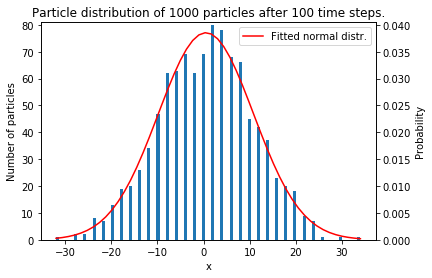

Theoretical values:	Mu = 0		Std = 14.1421
Numerical values:	Mu = 0.5	Std = 10.3525


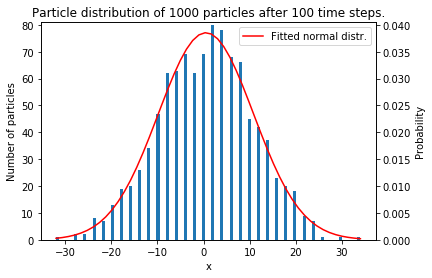

Theoretical values:	Mu = 0		Std = 14.1421
Numerical values:	Mu = 0.5	Std = 10.3525


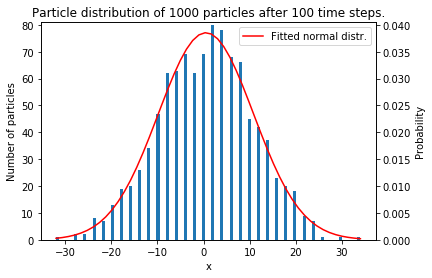

Theoretical values:	Mu = 0		Std = 14.1421
Numerical values:	Mu = 0.5	Std = 10.3525


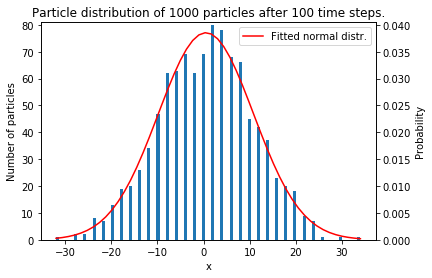

Theoretical values:	Mu = 0		Std = 14.1421
Numerical values:	Mu = 0.5	Std = 10.3525


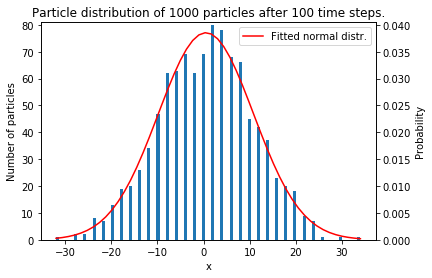

Theoretical values:	Mu = 0		Std = 14.1421
Numerical values:	Mu = 0.5	Std = 10.3525


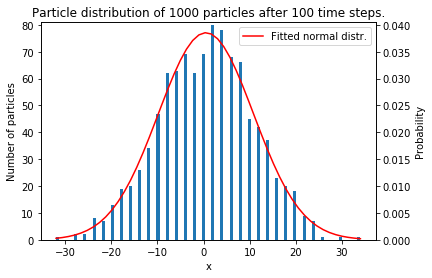

Lowest expextation value: 0.5 
Highest expextation value: 0.5
Lowest variance: 10.352487623754978 Highest variance: 10.352487623754978


In [3]:
particles = 1000         # number of particles at x = 0
time_steps = 100         # number of time steps 
d = 1                    # probability of a particle moving (in an arbitrary direction) ##KANSKJE FJERNES!
h = 1                    # step length
#random_data = os.urandom(4) 
#seed(int.from_bytes(random_data, byteorder="big"))

def random_walk(p_right, pos, h = 1):
    r = randint(0, 101) / 100           # Generates a random number between 0.01 and 1
    if r <= p_right:                    # Right step
        return pos + h
    else:                               # Left step
        return pos - h

    
def random_walk_in_1D(p_right = np.ones(201)*d/2):
    dist = np.zeros(particles)          # Distribution array
    for p in range(particles):          # Loops through every paricle
        i = 0
        #seed(datetime.now())
        for s in range(time_steps):     # Loops through time_steps per particle
            i = random_walk(p_right[i+100], i)
        dist[p] += i                    # Places the location of a particle in the distrubution array
    
    return dist


dist_1D = random_walk_in_1D()           # Creates the particle distribution after the particles have been through a random walk


def task_3_plot():
    #Plotting our data
    x_axis = np.linspace(dist_1D.min(), dist_1D.max())

    title = f"Particle distribution of {particles} particles after {time_steps} time steps."
    fig, ax1 = plt.subplots()
    plt.title(title)
    ax1.hist(dist_1D, 100)
    ax1.set_xlabel("x")
    ax1.set_ylabel("Number of particles")

    #Plotting a fitted normal distribution
    muf, stdf = norm.fit(dist_1D)                            # the expected value and standard deviation of our particles  
    norm_dist = norm.pdf(x_axis, loc = muf, scale = stdf)    # the fitted normal distribution
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Probability")
    ax2.plot(x_axis, norm_dist, "r-" ,label="Fitted normal distr.")
    ax2.set_ylim(0, np.max(norm_dist)*1.05)
    ax1.set_ylim(0, 1 / (np.sqrt(2*np.pi)*stdf) *2* particles*1.05)
    #ax2.plot(x_axis, norm.pdf(x_axis, loc = 0, scale = np.sqrt(2*100)), "b-" ,label="Theory says")

    plt.legend()    
    
    print(f"Theoretical values:\tMu = {0}\t\tStd = {np.sqrt(2*100):.6}")
    print(f"Numerical values:\tMu = {muf:.6}\tStd = {stdf:.6}")
    plt.show()
    
    return muf, stdf
    
def stat():
    mu_stat = np.zeros(5)
    std_stat = np.zeros(5)
    for n in range (5):
        muf, stdf = task_3_plot()
        mu_stat[n] = muf
        std_stat[n] = stdf
    min_mu = mu_stat.min()
    maks_mu = mu_stat.max()
    min_std = std_stat.min()
    maks_std = std_stat.max()
    return min_mu, maks_mu, min_std, maks_std
    
task_3_plot()
min_mu, maks_mu, min_std, maks_std = stat()
print("Lowest expextation value:", min_mu, "\nHighest expextation value:", maks_mu)
print("Lowest variance:", min_std, "Highest variance:", maks_std)


*Explanation of the results based on the theory from section 1 and 2*:
Theory Section 1 shows that diffusion is driven by random walk. Hence, the distribution of particles undergoing random walk can be described by the diffusion equation. In Exercise 2 it's been shown that the normal distribution function with expectation value and variance equal to $\mu = x_{0}$ and $\sigma = \sqrt{2Dt} $, respectively, is a solution to the diffusion equation. In this exercise, the particles start at $x_{0} = 0$, the diffusion constant $D$ equals 1 and the number of time steps is 100. Therefore, the theoretical expectaions value and variance is 0 and 14.14, respectively. 

The plot shows the particle distribution of 1000 particles after 100 time steps. By fitting a normal distribution to the particle distribution, the variance and absolute value of expectation is calculated to be less than $\mu = 0.6$ and $\sigma = 11$, respectively. Hence, the particle distribution plot can verify that the normal distribution can model how particles subjected to a random walk will be scattered. 

<font color='red'>For mye bruk av respectively. Kanskje lage en funksjon som finner et gjennomsnitt av forventningsverdi og varians? Eller finne et intervall.</font>

## 5 $\,$ Programming 
*Random walk in a potential*

First we define a help function <font color = 'blue'>p_right</font> which will be used in the plotting function. <font color = 'blue'>p_right</font> returns an array containing the probability of a particle moving to the right, given a potential field $V$ and position vector **x**. 

<font color = 'blue'>plot_distribution</font> plots the potential and the particle distribution after the random walk simulation, for a range of values of $\beta k$ given by the array **beta_k**.  

In [4]:
temperature = 298.15                      # Set to room temperature (25 Celcius)
beta = 1 / (const.k * temperature)        # Where const.k is the Boltzmann constant and 298.15 is the temperature in kelvin
beta_k = np.array([0, 0.5, 2, 5, 10])   # Selected values of the constant beta*k (here, k is NOT the Boltzmann constant)


def p_right(V, x, k):
    return 1 / (1 + np.exp(-beta*(V(x-h, k) - V(x+h, k))))

def plot_distribution(V, title):
    '''funksjon som gjør alt for deg i oppgave 5 ;)
    Finner fordeling, og plotter fordelinga og potensialet for de valgte verdiene for beta*k'''
    x = np.linspace(-100, 100, 201)   # x-values that is used as a basis for the potential vector
    
    plt.figure(title) 
    
    for k in beta_k/beta:
        probability_vector = p_right(V, x, k)                 # an array consisting of the probabilities of a particle moving right based on the position and potential field
    
        distribution = random_walk_in_1D(probability_vector)  # the particle distribution due to the field 
    
        #Plotting the particle dirtibution
        fig, ax1 = plt.subplots()
        ax1.hist(distribution, bins=100, label="Particle distribution")
        ax1.set_xlabel("x")
        ax1.set_ylabel("Number of particles")    
    
        # Plotting the potential
        mi, ma = plt.xlim()
        ax2 = ax1.twinx()
        ax2.plot(x, V(x, k), "k-", label=f"V(x) = {k:.2}x\n" + r"$\beta k$"+ f" = {k*beta:.3}")
        ax2.set_ylabel("J")
        ax2.set_xlim(mi, ma)
    
        plt.legend()
        plt.show()

### Excercise 5.1

\begin{equation}
    V \left( x \right) = kx.
\end{equation}

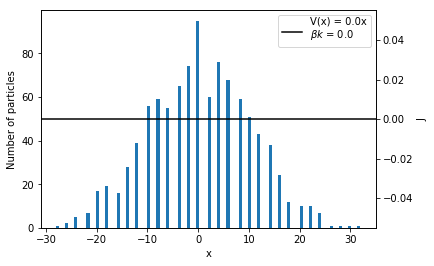

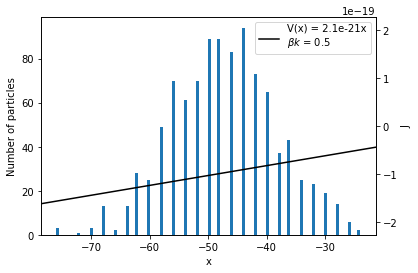

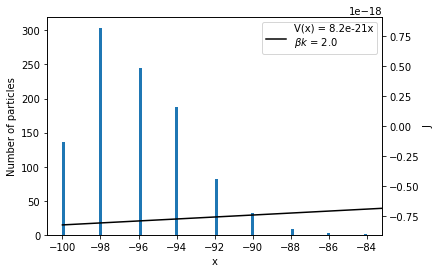

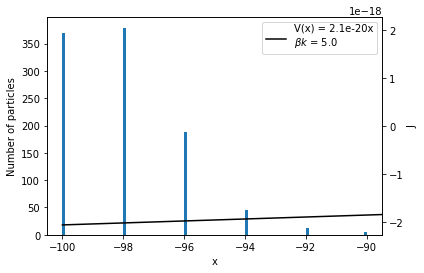

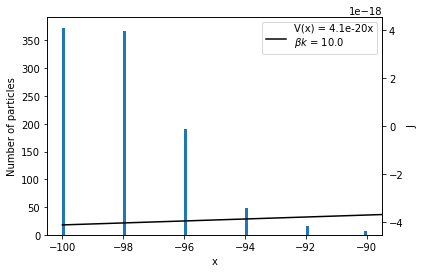

In [5]:
def const_electric_field(x, k):
    return k*x


title_5_1 = f"Particle distribution of {particles} particles after {time_steps} time steps with potential V(x) = kx.\n"

plot_distribution(const_electric_field, title_5_1)

In Theory Section 4 it was shown that the probability of the particle moving to the right is, 

\begin{equation}
    P = \frac{1}{1+e^{-\beta \left[ V(x-h)-V(x+h) \right]}}. 
\end{equation}

$P = \frac{1}{2}$ for small $\beta k$ where $\beta k$ is the ratio between the potential energy and thermal energy. This means there's an equal chance of the particle moving towards the left as towards the right. Hence, it corresponds to the case we had in exercise 3 with constant potential. Therefore, the plot representing $\beta k=0$ resembles the plot in exercise 3, that looks like a normal distribution with expectation equal 0. 

As $\beta k$ increases, the particles are more bound by the potential and the probability of the particle moving towards the left goes to 1. Hence, the plot shows that the particle distribution moves further to the left and the distribution norrows as $\beta k$ increases. 

<font color = 'red'>Må skrives litt om kanskje :)))</font>

### Excercise 5.2

\begin{align}
    &V \left( x \right) = k, \,\,\, \text{for} -3h < x < 3h. \\
    &V \left( x \right) = 0  \quad \text{otherwise.}
\end{align}

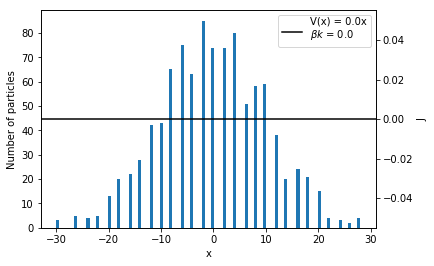

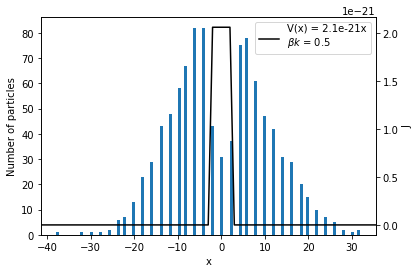

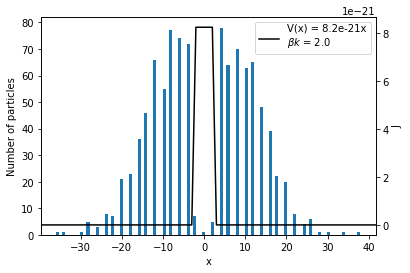

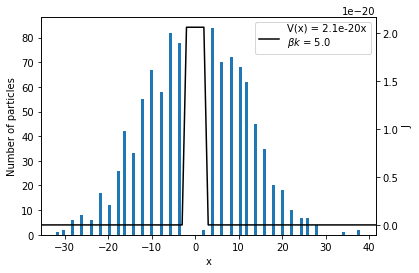

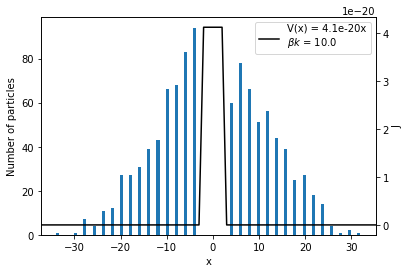

In [6]:
def membrane_potential(x, k):
    pot = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > -3*h and x[i] < 3*h:
            pot[i] = k
    return pot

    
#Denne tittelen er jævlig lang og dårlig mtp potensialforklaring heheheh :))
title_5_2 = f"Particle distribution of {particles} particles after {time_steps} time steps with constant potential in the middle???.\n"

plot_distribution(membrane_potential, title_5_2)

### Excercise 5.3

\begin{align}
    &V \left( x \right) = -k, \quad \text{for } x < -3h. \\
    &V \left( x \right) = k \left( -1 + 2 \frac{x + 3h}{6h} \right), \quad \text{for } -3h < x < 3h. \\
    &V \left( x \right) = k, \quad\,\,\, \text{for } x > 3h.
\end{align}

In [140]:
def membrane_pot_with_const_elec_res(x, k):
    pot = np.ones(len(x))
    for i in range(len(x)):
        if x[i] < -3*h:
            pot[i] *= -k
        elif x[i] > 3*h:
            pot[i] *= k
        else:
            pot[i] *= k * (-1 + 2*(x[i] + 3*h) / 6*h)
    return pot


title_5_3 = f"Particle distribution of {particles} particles after {time_steps} time steps with funky potential (???).\n"

#plot_distribution(membrane_pot_with_const_elec_res, title_5_3)

### Excercise 7.1

In [146]:
#initial conditions

Na_in_init = 50
Na_out_init = 1450
K_in_init= 1400
K_out_init = 50
T0 = 273 + 37
beta = 1 / (const.k * T0)
print(beta)
beta_V0 = [0,1,3]
L = 52
C_c = 0.07 * const.e
time_steps = 700
print("hei")

def calculate_normalized_potential(x, K_in, Na_in, membrane_pot):
    pot = np.zeros(len(x))
    for i in range(len(x)//2):
        pot[i] = (Na_in + K_in - Na_out_init - K_out_init) * 0.1e-3 * const.e**2*beta / C_c 
    pot[L//2] = (Na_in + K_in - Na_out_init - K_out_init) * 0.1e-3 *const.e**2 * beta / (C_c * 2)
    for i in range(L//2-1, L//2+2):
        pot[i] += membrane_pot
    return pot


def step(V_minus, V_plus):
    r = randint(0, 101) / 100 
    p = 1 / (1 + np.exp(-(V_minus - V_plus)))
    if r <= p:
        return 1
    else:
        return -1

def plot_potential(dist, x, pot):
    fig, ax1 = plt.subplots()
    ax1.hist(dist, bins=100, label="Particle distribution")
    ax1.set_xlabel("x")
    ax1.set_ylabel("Number of particles")    
    
    mi, ma = plt.xlim()
    ax2 = ax1.twinx()
    ax2.plot(x, pot, "k-", label=r"$\beta k$")
    ax2.set_ylabel("J")
    ax2.set_xlim(mi, ma)


    
def plot_distribution2(V0K, V0Na, title, V0_op = 0, task8 = False, potassium_pump = False):
    x = np.linspace(-L/2, L/2, L+1)   # x-values that is used as a basis for the potential vector
    
    dist_K = np.append(np.ones(K_out_init)*L//4, np.ones(K_in_init)*-L//4)
    dist_Na = np.append(np.ones(Na_out_init)*L//4, np.ones(Na_in_init)*-L//4)
    
    # Plotting the potential
    #dist = np.append(dist_K, dist_Na)
    #plot_potential(dist, x, potK)
    
    Na_in = Na_in_init
    K_in = K_in_init
    if task8:
            V0K_cl = V0K
            V0Na_cl = V0Na

    for t in range(time_steps):
        if task8:
            pot = (Na_in + K_in - Na_out_init - K_out_init)*0.1*const.e/C_c
            if (pot <= -70):
                V0Na = V0_op
                V0K = V0K_cl
            if (pot >= 30):
                V0Na = V0Na_cl
                V0K = V0_op
        if (potassium_pump and t%10 == 0 and Na_in>=3 and K_out_init+K_in_init-K_in>=2):
            posNa = np.array([])
            numNa=0
            index = -2
            while (numNa<3):
                a = np.argwhere(dist_Na == index)
                numNa += len(a)
                posNa = np.append(posNa, a)
                index -= 1
            for n in range(3):
                dist_Na[int(posNa[n])]=2
            
            posK = np.array([])
            numK =0
            index = 2
            while (numK<2):
                a = np.argwhere(dist_K == index)
                numK += len(a)
                posK = np.append(posK, a)
                index += 1
            for n in range(2):
                dist_K[int(posK[n])]=-2
        potK = calculate_normalized_potential(x, K_in, Na_in, V0K)
        potNa = calculate_normalized_potential(x, K_in, Na_in, V0Na)
        if t==0:
            pot_vec = np.array([potK[2]])
        else:
            pot_vec = np.append(pot_vec, [potK[2]])
        for i in range(len(dist_K)):
            if dist_K[i]>=L/2:
                dist_K[i]-=1
            elif dist_K[i]<=-L/2:
                dist_K[i]+=1
            else:
                dist_K[i]+=step(potK[int(L//2+dist_K[i])-1], potK[int(L//2+dist_K[i])+1])
        for j in range(len(dist_Na)):
            if dist_Na[j]>=L/2:
                dist_Na[j]-=1
            elif dist_Na[j]<=-L/2:
                dist_Na[j]+=1
            else:
                dist_Na[j]+=step(potNa[int(L//2+dist_Na[j])-1], potNa[int(L//2+dist_Na[j])+1])
        K_in = len([1 for n in dist_K if n<-1])
        Na_in = len([1 for n in dist_Na if n<-1])
        
    plt.figure(title)
                       
    dist = np.append(dist_K, dist_Na)
    plot_potential(dist, x, potK)
    
    #Plotting how the potenatialdifference changes with time
    plt.figure("fig2")
    plt.plot([n for n in range(len(pot_vec))], pot_vec)

    #plt.legend()
    plt.show()


2.3364429142421445e+20
hei


In [147]:
a = np.arange(-20, 11, 2)
np.random.shuffle(a)
b = np.argwhere(a < -1)
print(a)
a[b] = 99
print(a)

[  6   0 -20 -12  -2  -8   4   2 -16  -4  -6 -18 -10  10   8 -14]
[ 6  0 99 99 99 99  4  2 99 99 99 99 99 10  8 99]


### Exercise 7.1

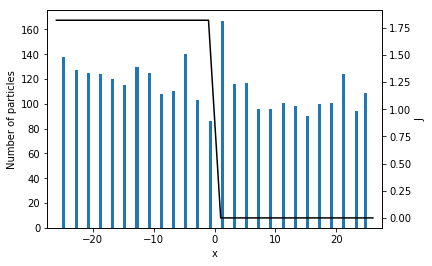

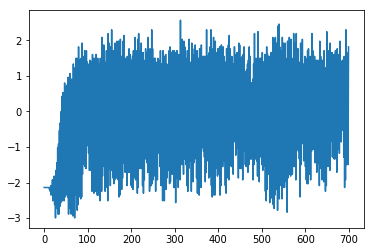

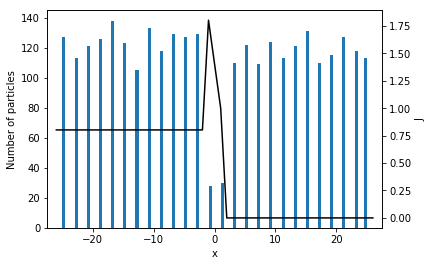

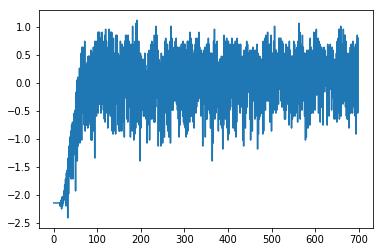

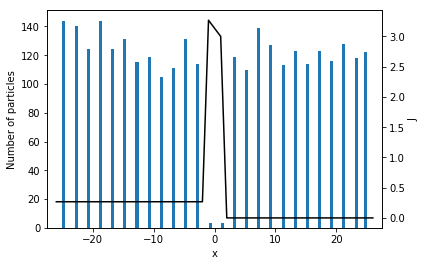

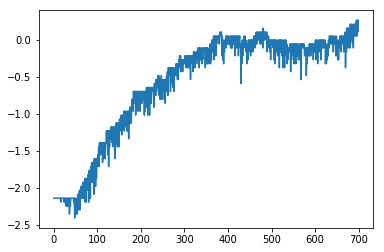

In [143]:
#Oppg 7.1
for n in beta_V0:
    plot_distribution2(n,n, "hei")


### Exercise 7.2

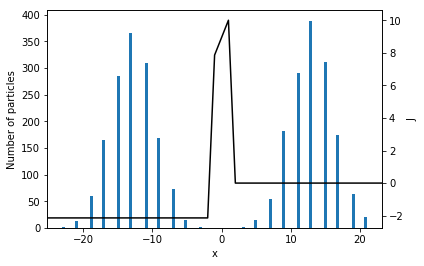

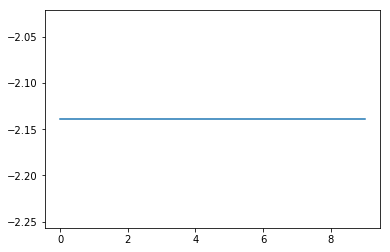

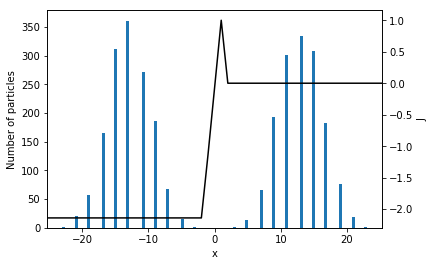

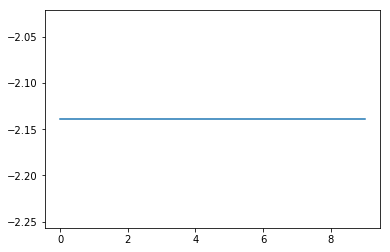

In [144]:
#Oppg 7.2
time_steps = 10
beta_V0 = [(10,1),(1,10)]
for n,m in beta_V0:
    plot_distribution2(n,m, "hei")

### Exercise 8.1

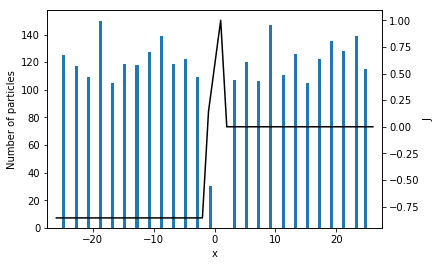

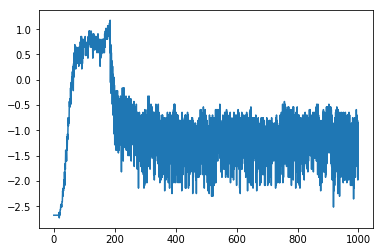

In [148]:
V0K_closed = 50
V0Na_closed = 50
V0_open = 1
time_steps = 1000

plot_distribution2(V0K_closed, V0Na_closed, "hei", V0_open, True)

### Exercise 8.2

In [151]:
time_steps = 5000
plot_distribution2(V0K_closed, V0Na_closed, "hei", V0_open, True, True)

KeyboardInterrupt: 